# TASK 6.2 Part 2 Exploring Relationships

### Importing libraries
### Importing ready_to_merge data sets from Prepared Data
### Merging the data sets
### Final consistency checks
### Exploring Relationships: Creating correlation matrix as a coloured heatmap, a scatterplot, a pair plot and a categorical plot

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
#turn folder into a string
path = r'C:\Users\melan\OneDrive\Career Foundry\World Happiness Report'

In [5]:
path

'C:\\Users\\melan\\OneDrive\\Career Foundry\\World Happiness Report'

Importing all 5 data sets

In [7]:
# Import ready_to_merge dataframe of 2015 from Prepared Data
df_2015_ready_to_merge = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_2015_ready_to_merge.csv'))

In [8]:
# Import ready_to_merge dataframe of 2016 from Prepared Data
df_2016_ready_to_merge = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_2016_ready_to_merge.csv'))

In [9]:
# Import ready_to_merge dataframe of 2017 from Prepared Data
df_2017_ready_to_merge = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_2017_ready_to_merge.csv'))

In [10]:
# Import ready_to_merge dataframe of 2018 from Prepared Data
df_2018_ready_to_merge = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_2018_ready_to_merge.csv'))

In [11]:
# Import ready_to_merge dataframe of 2019 from Prepared Data
df_2019_ready_to_merge = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_2019_ready_to_merge.csv'))

In [12]:
#let's merge them all!
merged_df = pd.concat([df_2015_ready_to_merge, df_2016_ready_to_merge, df_2017_ready_to_merge, df_2018_ready_to_merge, df_2019_ready_to_merge], ignore_index=True)


In [13]:
merged_df.head()

,Unnamed: 0,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [14]:
#check for the number of rows & columns
merged_df.shape

(782, 11)

In [15]:
#check to see the unique values in the year column
merged_df['Year'].unique()

array([2015, 2016, 2017, 2018, 2019], dtype=int64)

In [16]:
#but let's get rid of the Unnamed column that we seem to have AGAIN...
merged_df = merged_df.drop(columns = ['Unnamed: 0'])

In [17]:
merged_df.head()

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [18]:
#let's find out which matplotlib version I'm using
matplotlib.__version__

'3.8.4'

### Final consistency checks

In [20]:
#checking data types
merged_df.dtypes

Country or region                object
Overall rank                      int64
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Perceptions of corruption       float64
Generosity                      float64
Year                              int64
dtype: object

In [21]:
#check for missing values
merged_df.isnull().sum()

Country or region               0
Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Perceptions of corruption       0
Generosity                      0
Year                            0
dtype: int64

In [22]:
#no missing values
df_dups = merged_df[merged_df.duplicated()]

In [23]:
df_dups.shape

(0, 10)

In [24]:
#no duplicates, let's look for mixed-type data
for col in merged_df.columns.tolist():
    weird = (merged_df[[col]].map(type) != merged_df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (merged_df[weird]) > 0:
        print (col)

In [92]:
#export merged file to 02 Data, Prepared Data!
merged_df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_df.csv'))

### Exploring Relationships

In [26]:
# Create a correlation matrix using pandas, but select only numeric columns
numeric_df = merged_df.select_dtypes(include=[float, int])
#we'll also drop the year column for this numeric dataframe as that is a date
numeric_df = numeric_df.drop(columns=['Year'])
correlation_matrix = numeric_df.corr()

In [27]:
numeric_df.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
Overall rank,1.000000,-0.992066,-0.794791,-0.644842,-0.743655,-0.537942,-0.372162,-0.117713
Score,-0.992066,1.000000,0.789284,0.648799,0.742456,0.551258,0.397821,0.137578
GDP per capita,-0.794791,0.789284,1.000000,0.585966,0.784338,0.340511,0.304181,-0.014560
Social support,-0.644842,0.648799,0.585966,1.000000,0.572650,0.420361,0.126481,-0.037262
Healthy life expectancy,-0.743655,0.742456,0.784338,0.572650,1.000000,0.340745,0.250463,0.010638
Freedom to make life choices,-0.537942,0.551258,0.340511,0.420361,0.340745,1.000000,0.459520,0.290706
Perceptions of corruption,-0.372162,0.397821,0.304181,0.126481,0.250463,0.459520,1.000000,0.318945
Generosity,-0.117713,0.137578,-0.014560,-0.037262,0.010638,0.290706,0.318945,1.000000


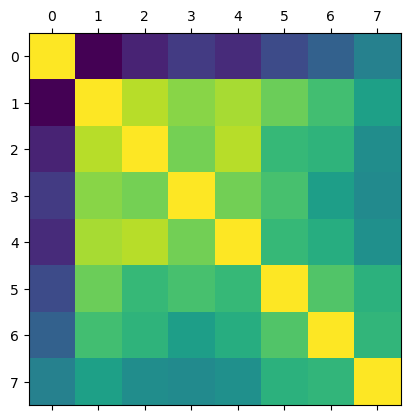

In [28]:
# Create a correlation heatmap using matplotlib

plt.matshow(numeric_df.corr())
plt.show()

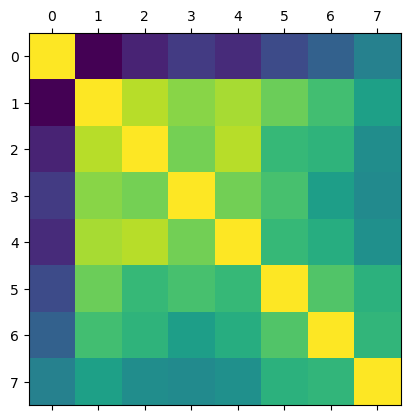

In [29]:
# Save figure
plt.matshow(numeric_df.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 

In [30]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\melan\\OneDrive\\Career Foundry\\World Happiness Report\\03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

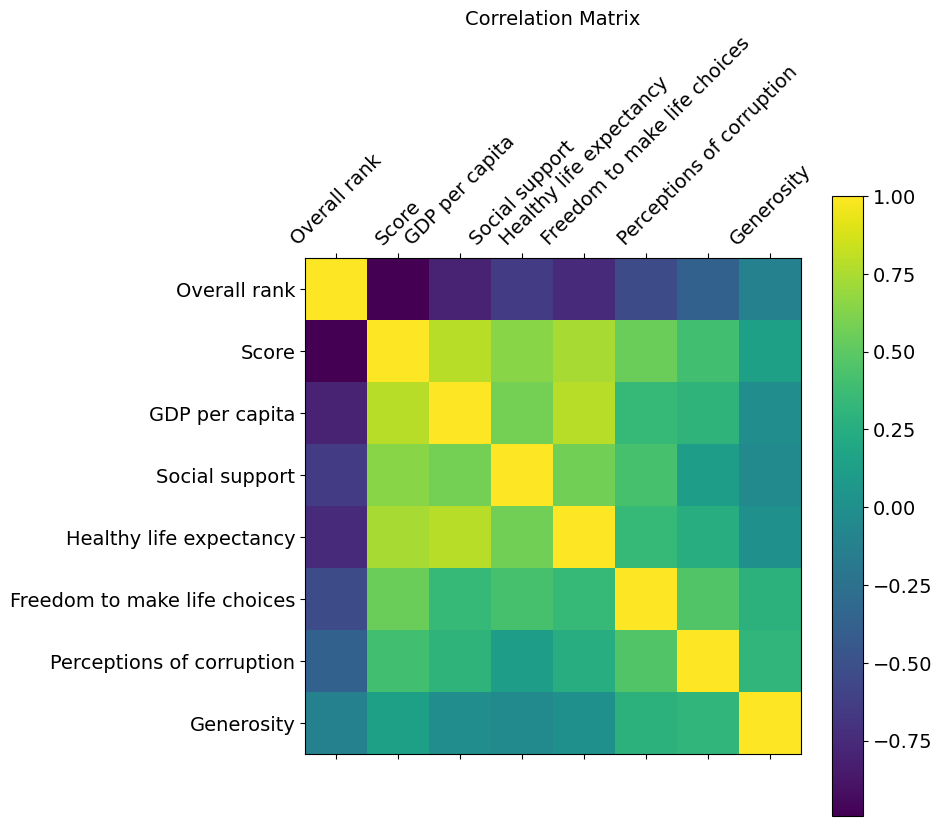

In [31]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(numeric_df.corr(), fignum=f.number) # type of plot
plt.xticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

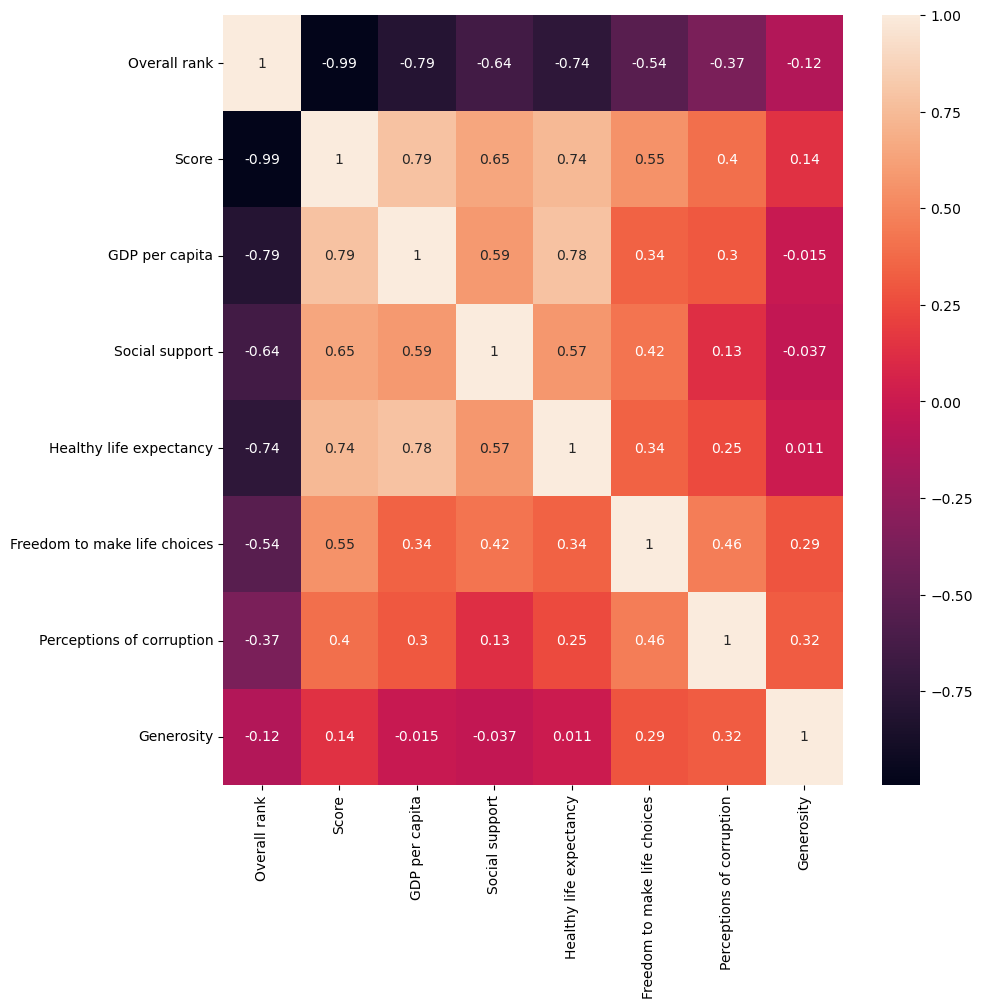

In [32]:
#Creating a correlation heat map using seaborn
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix using the numeric_df defined above.
corr = sns.heatmap(numeric_df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Using the (Happiness) Score as a dependent variable, we could use GDP per capita, Social support and Healthy life expectancy as indepedent variables...
GDP per capita, 0.79, the Gross Domestic Product measures the total output created and income earned through the products of goods and services. This shows a strong correlation, healthy economies where people have access to many resources tend to be happier
Social support, 0.65, another high correlation as people need to feel supported and cared for, a sense of belonging and community is so important for overall mental and emotional well being
Healthy life expectancy, 0.74, also a high correlation as people live longer, families are together longer, creating that sense of belonging as mentioned above. A healthy life expectancy is generally associated with a healthy lifestyle and good healthcare programs.

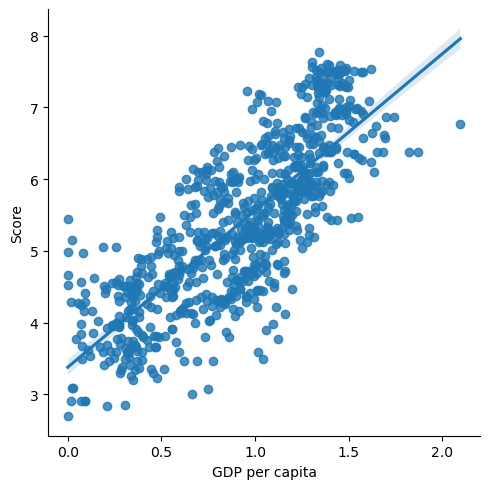

In [34]:
# Create a scatterplot for the "GDP per capita" and "Score" columns in seaborn

sns.lmplot(x = 'GDP per capita', y = 'Score', data = numeric_df)

This scatterplot shows the relationship between the (Happiness) Score and the GDP per capita (which is the highest correlation of the independent variables). Healthy economies where people have access to many resources tend to be happier

In [36]:
# Keep only the variables you want to use in the pair plot

sub_2 = numeric_df[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Score']]

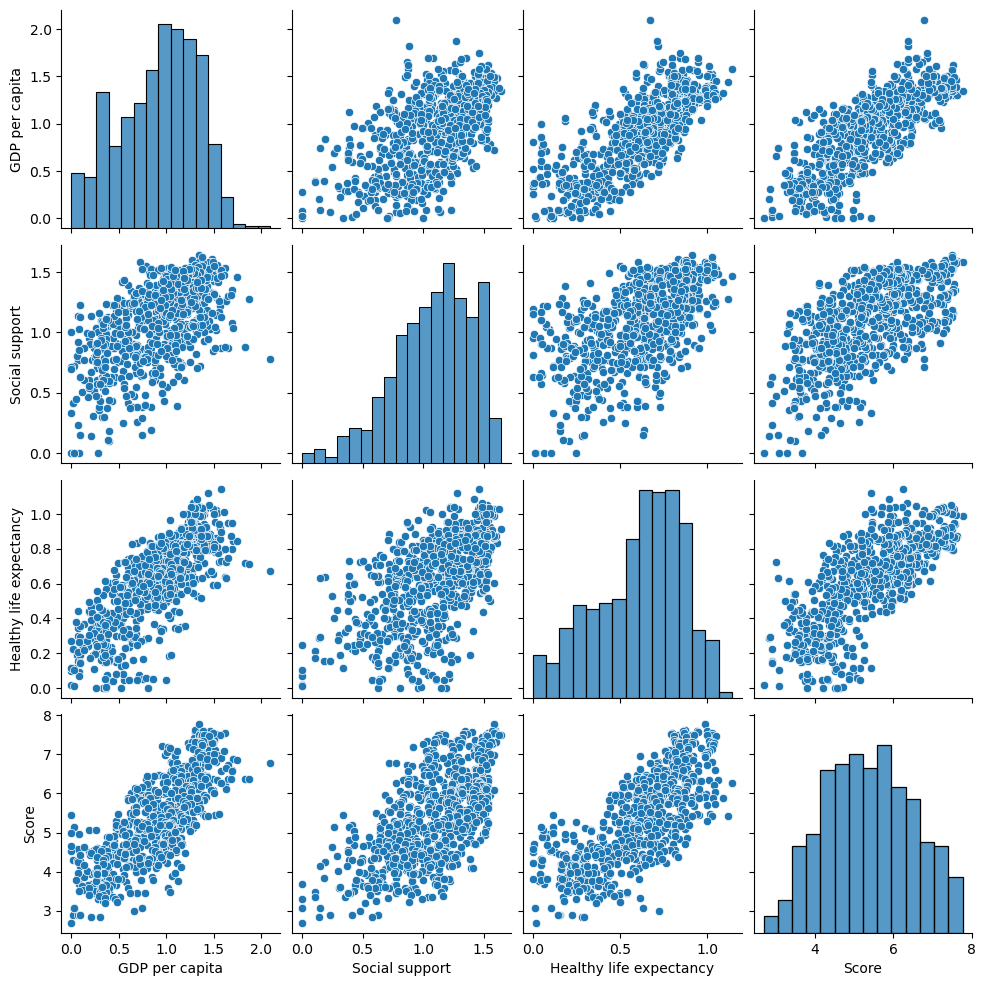

In [37]:
# Create a pair plot 

g = sns.pairplot(sub_2)

These pair plots show the relationships between the top 3 independent variables with the dependent value of the (Happiness) Score. These mainly look the same showing a postive correlation for the scatterplots. These variables reinforce each other, health can influence productivity, and social services. I am curious to see how GDP per capita, social support and healthy life expectancy is scored across ALL regions or countries, if there is any cultural or regional variance.

Categorical Plots

<Axes: xlabel='Score', ylabel='Count'>

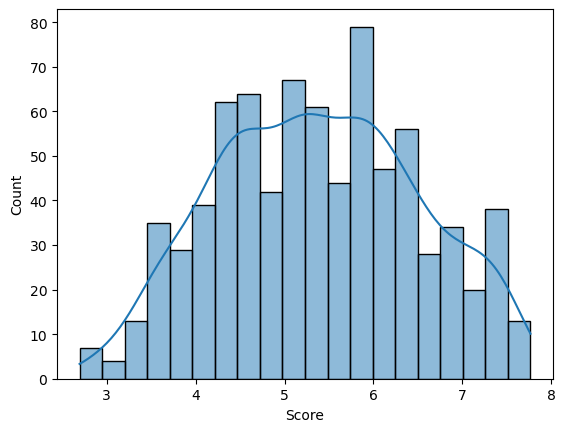

In [40]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(numeric_df['Score'], bins = 20, kde = True)

In [41]:
numeric_df.loc[numeric_df['Score'] < 3, 'Score category'] = 'Low scores'

In [42]:
numeric_df.loc[(numeric_df['Score'] >= 3) & (numeric_df['Score'] < 4.5), 'Score category'] = 'Low-Mid range scores'

In [43]:
numeric_df.loc[(numeric_df['Score'] >= 4.5) & (numeric_df['Score'] < 6.5), 'Score category'] = 'Mid-High range scores'

In [44]:
numeric_df.loc[numeric_df['Score'] >= 6.5, 'Score category'] = 'Highest scores'

In [45]:
# Check the value counts
print(numeric_df['Score category'].value_counts(dropna=False))

Score category
Mid-High range scores    457
Low-Mid range scores     185
Highest scores           133
Low scores                 7
Name: count, dtype: int64


I've divided this chart into 4 parts: Low, Low-Mid range, Mid-High range, Highest. I am curious see which countries have the lowest happiness scores (potentally seeing what is lacking and what could be done to boost their scores) and which ones have the highest.

In [47]:
numeric_df.columns

Index(['Overall rank', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices',
       'Perceptions of corruption', 'Generosity', 'Score category'],
      dtype='object')

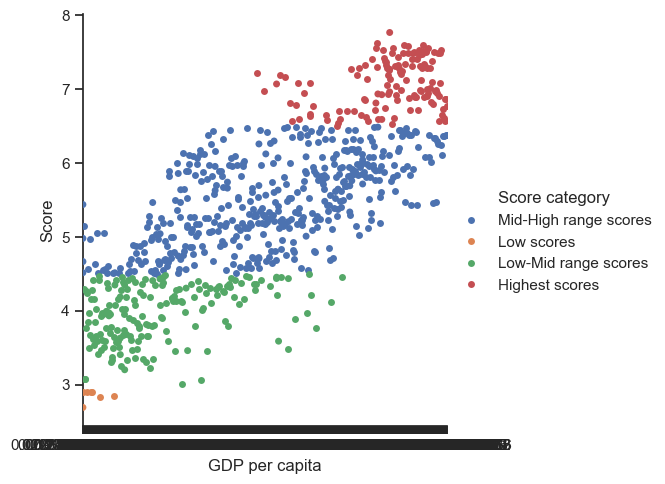

In [48]:
# Create a categorical plot in seaborn using the score categories created above

sns.set(style="ticks")
g = sns.catplot(x="GDP per capita", y="Score", hue="Score category", data=numeric_df)

In [49]:
# fig = g.get_figure()
g.savefig("GDP per capital.png") 

# Again, the image will be saved in the working directory. 

Based on the exploratory questions I wrote from the previous assignment, I have a lot of questions left! 
Questions to Explore

I’m curious to see if the ‘richest’ countries in the world are happie. (yes, it looks like this is the case right now)t.
I’m curious to see if trends over this 5 year period indicate consistent happiness or decreasing happiness or increasing happiness.
What countries/regions have experienced the most growth in happiness and why?
What countries/regions have experienced a decline in happiness and why?
What is the strongest predictor of happiness of the variables in this r (GDP per capita)eport?
Are people with strong social support system h (to a lesser degree than GDP per capita)appier?
Does trust in the government impact the happiness score?

I per capita know GDP has the greatest influence on a countries happiness.

Hypothesis:
If a country has a higher GDP per capita, then it will have a higher happiness score.
If a country has a better Social support, then it will have a higher happiness score.
If a country has a higher Healthy life expectancy, then it will have a higher happiness score.